In [333]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('C:/Users/Lenovo/Desktop/DATA/msft.pkl')

In [335]:
#3653 data points, 3 columns
df_stocks.head()
#df_stocks.shape

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...


In [336]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [337]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [338]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

In [339]:
df_stocks.head()

,prices,articles
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...


In [340]:
df = df_stocks[['prices']].copy()

In [341]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [342]:
df.head()

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,


In [343]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df_stocks.loc[date, 'articles'])
        print(date)

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [344]:
df.shape

(3653, 5)

In [345]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [346]:
train.shape
test.shape

(731, 5)

In [347]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [348]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [349]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [350]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
# Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])     
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    

In [351]:
numpy_df_train.shape

(305, 4)

In [352]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [353]:
numpy_df_test

array([[-0.9975,  0.172 ,  0.762 ,  0.067 ],
       [-0.9852,  0.125 ,  0.793 ,  0.082 ],
       [-0.9885,  0.111 ,  0.823 ,  0.066 ],
       [-0.9952,  0.15  ,  0.77  ,  0.08  ],
       [-0.9956,  0.155 ,  0.798 ,  0.048 ],
       [-0.6715,  0.143 ,  0.731 ,  0.126 ],
       [-0.9914,  0.146 ,  0.775 ,  0.079 ],
       [-0.9981,  0.168 ,  0.757 ,  0.074 ],
       [ 0.9556,  0.109 ,  0.766 ,  0.125 ],
       [-0.9701,  0.092 ,  0.854 ,  0.054 ],
       [-0.4696,  0.089 ,  0.828 ,  0.083 ],
       [-0.9797,  0.101 ,  0.847 ,  0.052 ],
       [-0.2709,  0.127 ,  0.73  ,  0.143 ],
       [-0.9833,  0.105 ,  0.818 ,  0.077 ],
       [-0.9942,  0.147 ,  0.763 ,  0.091 ],
       [-0.9909,  0.122 ,  0.81  ,  0.068 ],
       [-0.9739,  0.111 ,  0.811 ,  0.078 ],
       [-0.9924,  0.155 ,  0.736 ,  0.109 ],
       [-0.986 ,  0.109 ,  0.851 ,  0.04  ],
       [-0.765 ,  0.104 ,  0.822 ,  0.073 ],
       [-0.9974,  0.182 ,  0.756 ,  0.062 ],
       [-0.9987,  0.211 ,  0.705 ,  0.084 ],
       [ 0

In [354]:
# Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu',solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    model = mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction

array([17716, 17851, 17740, 18538, 18552, 17623, 18552, 18526, 17148,
       18529, 18094, 17603, 18503, 18121, 18538, 17851, 18121, 17716,
       18121, 18616, 18526, 18169, 18544, 18552, 18538, 17740, 18533,
       18526, 17000, 17710, 17851, 18538, 18538, 18533, 18538, 18526,
       18121, 18552, 18161, 18526, 17851, 17740, 18526, 18121, 17740,
       18552, 18533, 18161, 18538, 17603, 18538, 18169, 18538, 18143,
       17535, 18552, 18526, 17495, 18533, 18526, 17808], dtype=int64)

In [362]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, prediction)

ValueError: Found input variables with inconsistent numbers of samples: [731, 61]

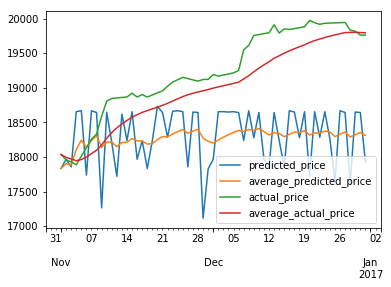

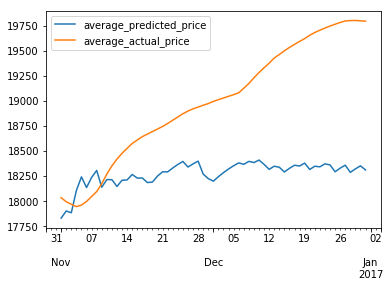

In [357]:
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list
    
    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20).mean()   
    
     # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
    plt.show()

In [359]:
predictions_df_list_average.loc[:,'difference'] = predictions_df_list_average.average_predicted_price - predictions_df_list_average.average_actual_price
predictions_df_list_average.loc[:,'difference']= predictions_df_list_average.loc[:,'difference'].abs()
predictions_df_list_average.loc[:,'pct_difference'] = ((predictions_df_list_average.difference)/(predictions_df_list_average.average_actual_price)) * 100

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
predictions_df_list_average.head()

In [360]:
predictions_df_list_average['pct_difference'].mean()

3.8583300067062463

In [ ]:
x = 10
print ("Varibale =" , x , "bal = ", x)